# Lecture 11: PDE with Boundary Condition
Prof. Flip Tanedo
9 May 2017

Based on Example 9.1 of Newman, *Computational Physics*

In [87]:
import numpy as np

# Constants
M = 10        # grid squares per side
V = 1.0        # Voltage at the top
target = 1e-2  # target accuracy

# arrays
phi = np.zeros([M+1,M+1],float) # initialize
phi[0,:] = V
phiprime = np.zeros([M+1, M+1],float) # container for new values

print(phi)

# Main Loop
delta = 1.0
while delta > target:
    # calculate new values of the potential

    for i in range(M+1):
        for j in range(M+1):

            # if boundary
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4.
    
    # NOTE: indentation is very important!
    # convergence check
    delta = np.max(np.abs(phi-phiprime))
            
    # swap arrays
    phi, phiprime = phiprime, phi

            
print(phi)

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 1.          1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.        ]
 [ 0.          0.47024481  0.63936379  0.70556936  0.73174477  0.73859828
   0.73174477  0.70556936  0.63936379  0.47024481  0.        ]
 [ 0.          0.24690785  0.39114488  0.46488425  0.49809212  0.50774957
   0.49809212  0.46488425  0.39114488  0.24690785  0.        ]
 [ 0.          0.1349887   0.23091758  0.28748279  0.31600021  0.32422606
   0.

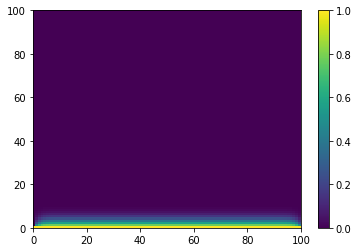

In [86]:
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.arange(M+1),np.arange(M+1))
plt.pcolormesh(xx,yy,phi)
plt.colorbar()
plt.show()